In [1]:
# !pip install opencv-python scikit-learn pandas numpy matplotlib tensorflow-addons
# !pip install tensorflow==2.12 keras==2.12
# !pip install transformers datasets torchvision

In [2]:
import os
import kagglehub
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Conv2D, Multiply, GlobalAveragePooling2D, Dense, Input, Softmax, Add
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import kagglehub
from transformers import ViTImageProcessor, ViTForImageClassification
import torch
from datasets import load_dataset
from PIL import Image
import requests
from sklearn.metrics import classification_report
import torch
from torch.optim import AdamW 
from transformers import ViTFeatureExtractor
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

2025-08-10 08:07:56.979708: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754813277.172846      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754813277.236982      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
path = kagglehub.dataset_download("adityamahimkar/iqothnccd-lung-cancer-dataset")
print("Path to dataset files:", path)
path = kagglehub.dataset_download("justinkirby/the-cancer-imaging-archive-lidcidri")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/iqothnccd-lung-cancer-dataset
Path to dataset files: /kaggle/input/the-cancer-imaging-archive-lidcidri


In [4]:
data_dir = '/kaggle/input/iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset'
test_dir = '/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases'

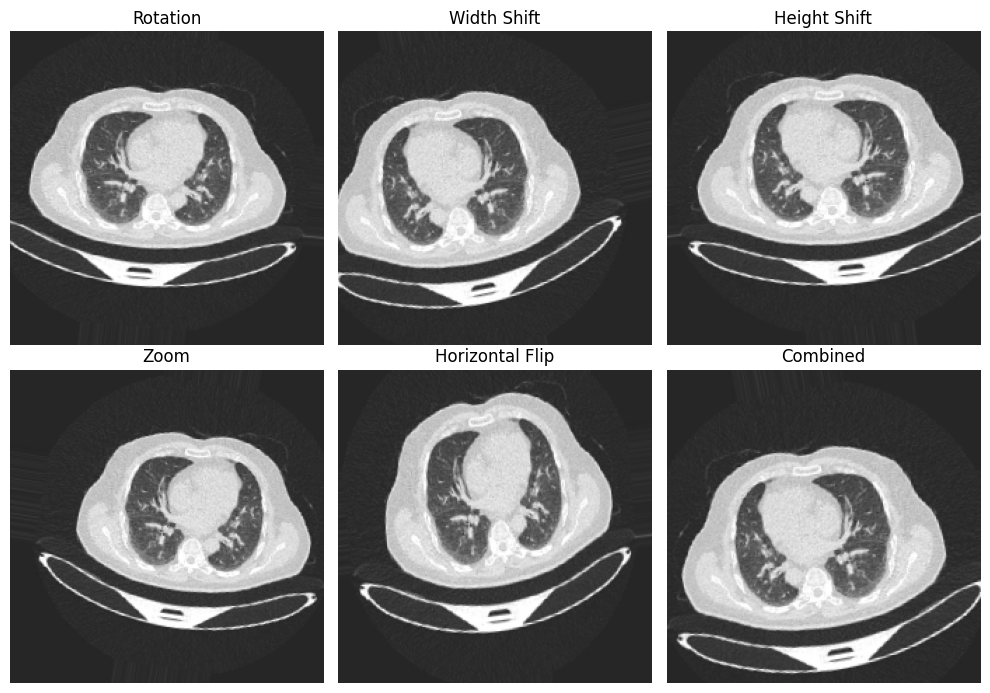

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

img_path = "/kaggle/input/iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (1).jpg"
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

fig, axes = plt.subplots(2, 3, figsize=(10, 7))
axes = axes.ravel()

transform_labels = [
    "Rotation",
    "Width Shift",
    "Height Shift",
    "Zoom",
    "Horizontal Flip",
    "Combined"
]

for i, (batch, label) in enumerate(zip(datagen.flow(x, batch_size=1), transform_labels)):
    axes[i].imshow(np.squeeze(batch))
    axes[i].set_title(label)
    axes[i].axis('off')
    if i == 5:
        break

plt.tight_layout()
plt.show()


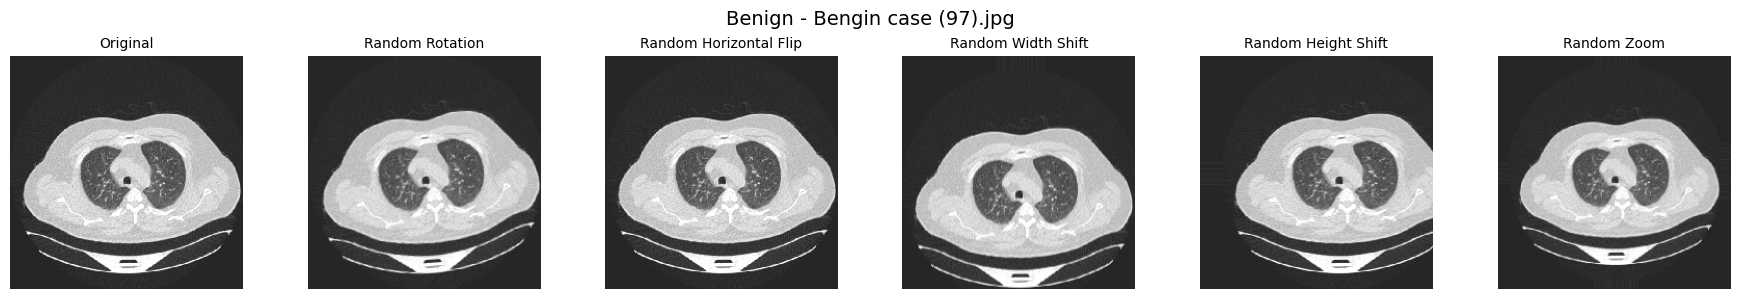

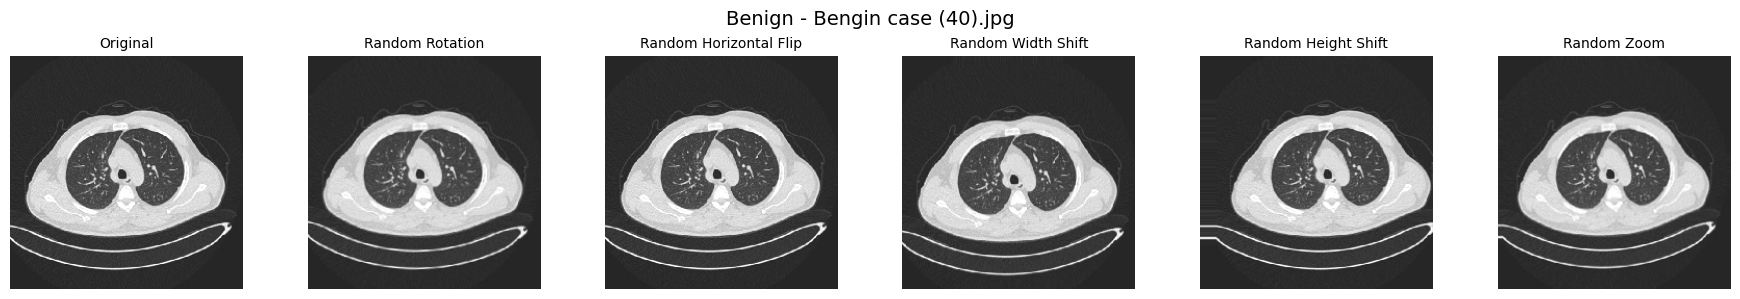

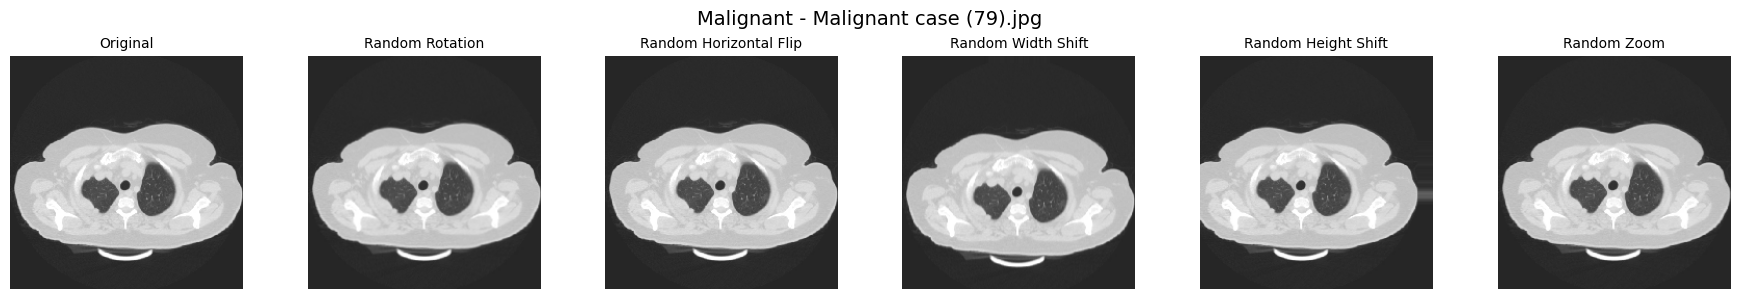

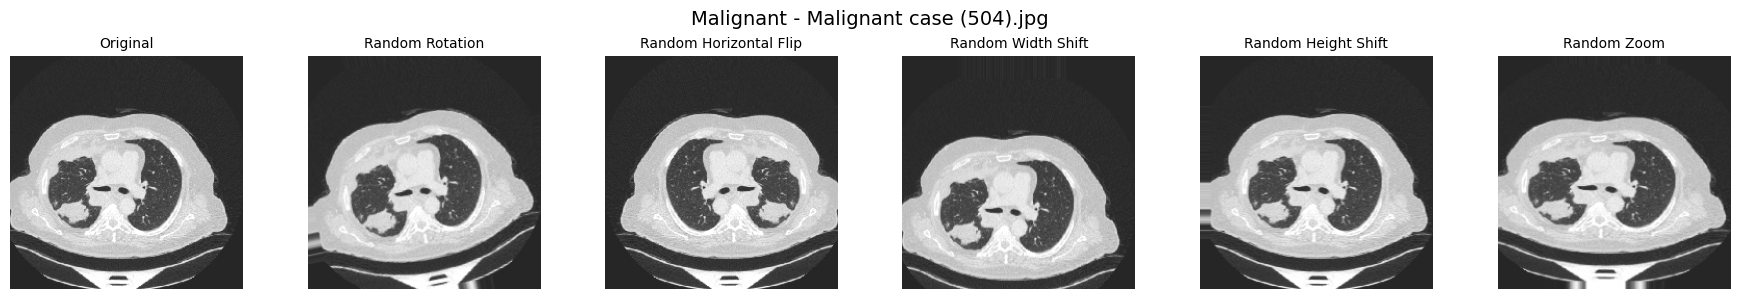

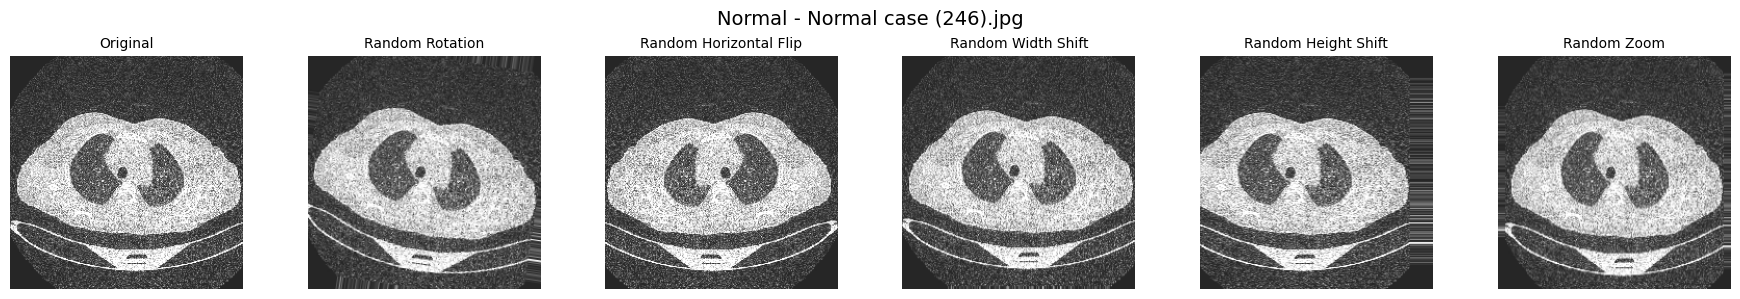

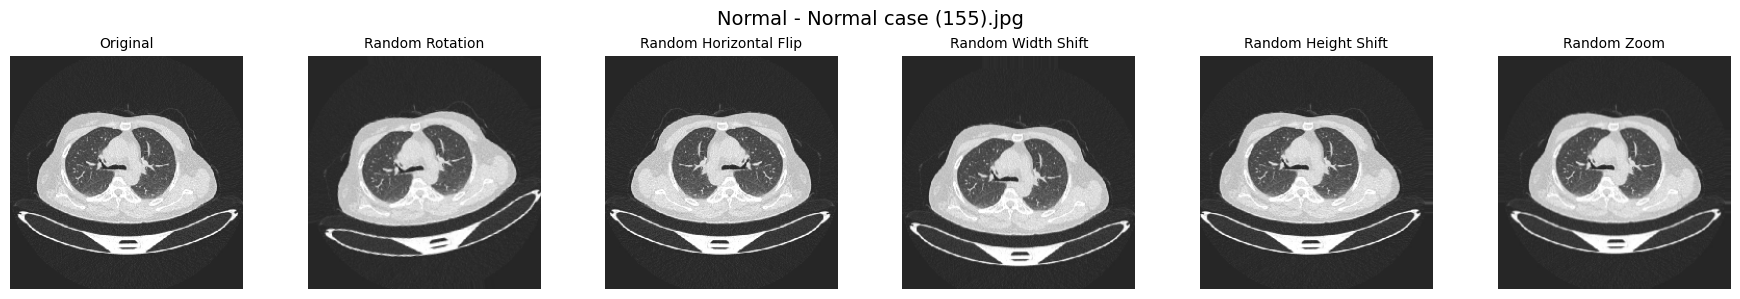

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# Paths to folders
folders = {
    "Benign": "/kaggle/input/iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases",
    "Malignant": "/kaggle/input/iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Malignant cases",
    "Normal": "/kaggle/input/iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases"
}

# Define augmentations
augmentations = {
    "Original": ImageDataGenerator(),
    "Random Rotation": ImageDataGenerator(rotation_range=15),
    "Random Horizontal Flip": ImageDataGenerator(horizontal_flip=True),
    "Random Width Shift": ImageDataGenerator(width_shift_range=0.1),
    "Random Height Shift": ImageDataGenerator(height_shift_range=0.1),
    "Random Zoom": ImageDataGenerator(zoom_range=0.1)
}

img_size = (224, 224)

# Process each class folder
for class_name, folder_path in folders.items():
    img_files = os.listdir(folder_path)[:2]  # Take first 2 images
    for img_file in img_files:
        img_path = os.path.join(folder_path, img_file)
        img = load_img(img_path, target_size=img_size)
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)

        images = []
        for name, gen in augmentations.items():
            for batch in gen.flow(x, batch_size=1):
                images.append((name, batch[0].astype('uint8')))
                break

        plt.figure(figsize=(18, 3))
        for i, (name, image) in enumerate(images):
            plt.subplot(1, len(images), i+1)
            plt.imshow(image)
            plt.title(name, fontsize=10)
            plt.axis('off')
        plt.suptitle(f"{class_name} - {img_file}", fontsize=14)
        plt.tight_layout()
        plt.show()
